In [24]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import random
from itertools import combinations
import hashlib
from scipy import stats

In [25]:
def test_test(test_function, array_function1, array_function2): 
    tmp_array = []
    for i in range(1000):
        x1 = array_function1() #функции, которые получаем в выборке для тестирования критериев
        x2 = array_function2()
        tmp_array.append(test_function(x1,x2))
    return np.array(tmp_array)

In [29]:
def normal_smp(): 
    return np.random.normal(100,10,1000)

def normal_smp1(): 
    return np.random.normal(100,10,1000)

def ttest(x1,x2): 
    return stats.ttest_ind(x1,x2)[1]

In [30]:
p_vaule_array = test_test(ttest,normal_smp,normal_smp1)

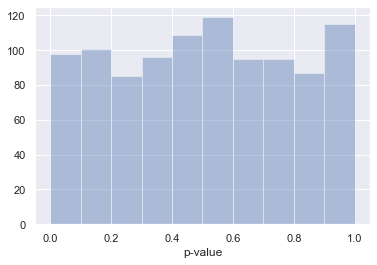

In [31]:
sns.distplot(p_vaule_array, bins=10,hist=True, kde=False,axlabel='p-value') #распределение t-теста

In [32]:
stats.binomtest(p_vaule_array[p_vaule_array<0.05].shape[0], n=1000, p=0.05, alternative='two-sided')

BinomTestResult(k=41, n=1000, alternative='two-sided', proportion_estimate=0.041, pvalue=0.2168576924970875)

In [3]:
df = pd.read_csv('2_conversion.csv') # загружаем данные
def date_converter(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')
df['event_date']=df.event_date.apply(date_converter) #приводим дату к нужному формату

In [4]:
def choose_date(data, start_date, delta, share): 
    tmp = data[(data.event_date>=start_date)&(data.event_date<=start_date+datetime.timedelta(days=delta))]
    tmp=tmp.groupby(['cookie_id']).sum().reset_index()
    x = tmp[(tmp.cookie_id)%100<=int(100*share)].reset_index()
    return x

In [18]:
x1 =choose_date(df, datetime.datetime(2020, 11, 21, 0, 0),15,0.1) #получаем необходимую подвыборку

from statsmodels.stats.power import tt_ind_solve_power
 
mean = x1.item_views.mean()
std = x1.item_views.std()
 
alpha = 0.01
power = 0.8
result_effect = 0.04 # целевой размер относительного отклоенения исходной метрики
effect_size = (mean /std) * result_effect
 